# IMPORT LIBRARIES

In [7]:
# Import necessary libraries
import BiQ_Common_Fxns as BiQ
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for creating plots
import itertools  # for iterators and looping functions
import math  # for mathematical operations
import statsmodels.formula.api as smf  # for statistical modeling
import statsmodels.api as sm  # for statistical analysis and modeling
import ipywidgets as widgets
from IPython.display import display
import mplcursors
import mpldatacursor
import plotly.graph_objects as go

# EXTRACT DATA FROM WORKSHEET

In [8]:
# Initialize a global variable to store DataFrame read from Excel
global_df = None

def read_excel_file(file_path):
    """Reads an Excel file and returns a DataFrame."""
    global global_df  # Access the global DataFrame variable
    try:
        df = pd.read_excel(file_path)  # Read Excel file into a temporary DataFrame
        df = df.dropna(axis=1, how='all')  # Drop columns that are entirely blank
        global_df = df.copy()  # Assign the modified DataFrame to the global variable
        return global_df  # Return the DataFrame
    except Exception as e:
        print(f"Error reading Excel file: {e}")  # Print error message if file reading fails
        return None  # Return None if an error occurs

def extract_factor_values(df, factors_column):
    """Extracts unique factor values from the specified column."""
    try:
        factor_values = df[factors_column].dropna().unique()  # Extract unique factor values from specified column
        return factor_values  # Return the unique factor values
    except Exception as e:
        print(f"Error extracting factor values: {e}")  # Print error message if extraction fails
        return None  # Return None if an error occurs

def process_excel_file(file_paths):
    """Processes the selected Excel file."""
    if file_paths:  # Check if file paths are provided
        results_file = file_paths[0]  # Get the first file path from the list
        factors_column = 'Factor'  # Define the column name containing factors
        df = read_excel_file(results_file)  # Read Excel file into DataFrame
        if df is not None:  # Check if DataFrame is successfully loaded
            factor_values = extract_factor_values(df, factors_column)  # Extract factor values from DataFrame
            return df, factor_values  # Return the DataFrame and factor values
    return None, None  # Return None for DataFrame and factor values if file loading fails

def main():
    file_paths, _ = BiQ.open_file_dialog()  # Open a file dialog to select Excel file(s)

    if file_paths:  # Check if file paths are provided
        results_file = file_paths[0]  # Get the first file path from the list
        df = read_excel_file(results_file)  # Read Excel file into DataFrame
        if df is not None:  # Check if DataFrame is successfully loaded
            # Perform additional processing logic here
            pass
    else:
        print("No file selected.")  # Print message if no file is selected

# Call the main function if the script is executed directly
if __name__ == "__main__":
    main()


Selected files:
C:/Users/ChrisSaid/OneDrive - Boulder BioMed/Documents/SEAL_DOE_FULL_FACT_CS29APR2024.xlsx [SEAL_DOE_FULL_FACT_CS29APR2024.xlsx]


# ANALYSIS

## MAIN EFFECTS PLOT





                               MAIN EFFECTS PLOT                                
The main effects plot visualizes the individual effects of factors on the dependent variable (results).

~ Each bar represents the main effect of a factor.
~ The height of the bar indicates the magnitude and direction of the effect:
  ~ Positive values indicate that increasing the factor level positively impacts the results.
  ~ Negative values indicate that increasing the factor level negatively impacts the results.
  ~ Zero indicates no effect of the factor on the results.


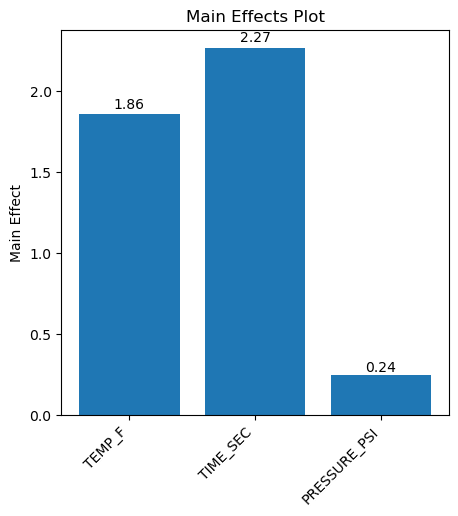

In [9]:
# Print explanation of the main effects plot
print("\n\n\n")
print("=" * 80)
print("MAIN EFFECTS PLOT".center(80))
print("=" * 80)
print("The main effects plot visualizes the individual effects of factors on the dependent variable (results).\n")
print("~ Each bar represents the main effect of a factor.")
print("~ The height of the bar indicates the magnitude and direction of the effect:")
print("  ~ Positive values indicate that increasing the factor level positively impacts the results.")
print("  ~ Negative values indicate that increasing the factor level negatively impacts the results.")
print("  ~ Zero indicates no effect of the factor on the results.")
print("=" * 80)


# Define a function to plot main effects
def main_effects_plot(df):
    """Plots main effects based on the DataFrame."""
    if df is None:
        print("DataFrame is empty.")
        return
    
    # Assuming 'Factor' and 'Results' are columns in the DataFrame
    factors_column = 'Factor'
    results_column = 'Results'
    
    # Extract unique factor values
    factors = df[factors_column].dropna().unique()
    
    # Calculate main effects
    main_effects = {}
    for factor in factors:
        # Calculate mean for positive and negative levels of each factor
        mean_plus = df[df[factor] == 1][results_column].mean()
        mean_minus = df[df[factor] == -1][results_column].mean()
        # Compute the main effect as the difference between means
        main_effects[factor] = mean_plus - mean_minus

    # Plot main effects
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(main_effects.keys(), main_effects.values())

    # Annotate the bars with their values
    for factor, value in main_effects.items():
        ax.text(factor, value + 0.01 * abs(value), '{:.2f}'.format(value), ha='center', va='bottom')

    # Set labels and title
    ax.set_ylabel('Main Effect')
    ax.set_title('Main Effects Plot')
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Call the function
main_effects_plot(global_df)

## INTERACTION PLOTS

### INTERACTION EFFECTS PLOT





                         INTERACTION EFFECTS BAR GRAPH                          
The interaction effects bar graph visualizes the combined effect of two factors on the dependent variable (results).

~ Each bar represents the interaction effect between two factors.
~ The height of the bar indicates the magnitude of the interaction effect.
~ Positive values indicate that the combined effect of the factors is greater than the sum of their individual effects.
~ Negative values suggest that the combined effect is less than the sum of their individual effects.
~ Zero indicates no interaction effect.


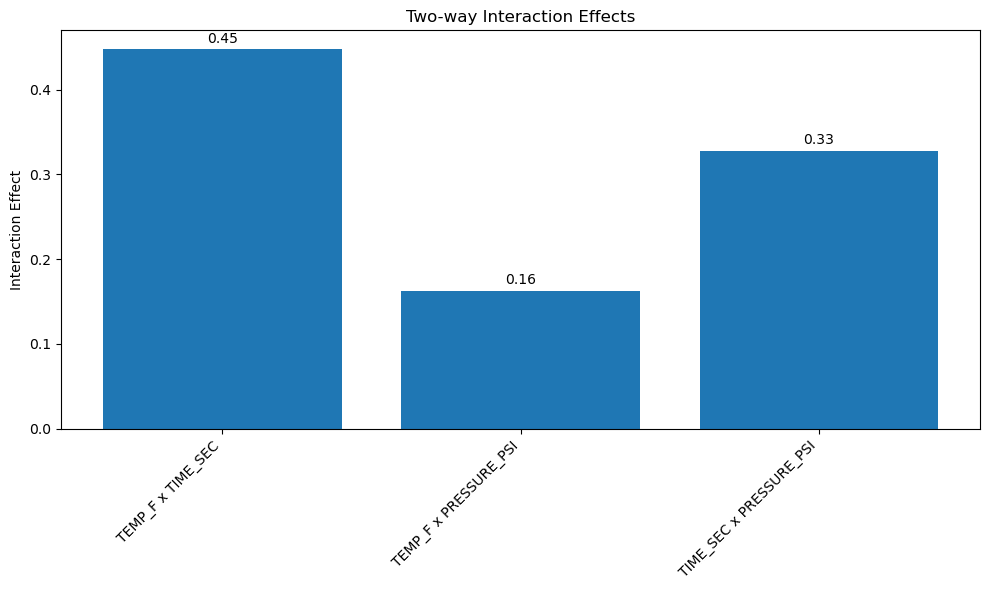

In [10]:
# Print explanation of the interaction effects bar graph
print("\n\n\n")
print("=" * 80)
print("INTERACTION EFFECTS BAR GRAPH".center(80))
print("=" * 80)
print("The interaction effects bar graph visualizes the combined effect of two factors on the dependent variable (results).\n")
print("~ Each bar represents the interaction effect between two factors.")
print("~ The height of the bar indicates the magnitude of the interaction effect.")
print("~ Positive values indicate that the combined effect of the factors is greater than the sum of their individual effects.")
print("~ Negative values suggest that the combined effect is less than the sum of their individual effects.")
print("~ Zero indicates no interaction effect.")
print("=" * 80)


def interaction_effects_plot(df, results_column):
    """
    Plots interaction effects based on the DataFrame and results_column.
    
    Args:
    - df (pd.DataFrame): DataFrame containing the data.
    - results_column (str): Name of the column containing the results.
    """
    if df is None or df.empty:  # Check if DataFrame is empty
        print("DataFrame is empty.")
        return

    # Filter columns based on unique values in the 'Factor' column
    factors = df['Factor'].unique()
    factor_columns = [col for col in factors if col in df.columns]

    # Filter combinations to include only those involving factor_columns
    interactions = list(itertools.combinations(factor_columns, 2))
    
    # Initialize lists to store interaction labels and effects
    interaction_labels = []
    interaction_effects = []
    
    # Calculate interaction effects
    for interaction in interactions:
        try:
            # Group data by the current interaction and calculate mean for results_column
            grouped = df.groupby(list(interaction))[results_column].mean()
            # Calculate interaction effect
            interaction_effect = (grouped[(1, 1)] - grouped[(1, -1)] - grouped[(-1, 1)] + grouped[(-1, -1)]) / 2
            # Append interaction label and effect to respective lists
            interaction_labels.append(f"{interaction[0]} x {interaction[1]}")
            interaction_effects.append(interaction_effect)
        except KeyError:
            # Handle KeyError if the current interaction is not found in the data
            print(f"Interaction {interaction} not found in the data. Skipping.")
            continue

    # Plot the interaction effects if both lists have the same length and are not empty
    if interaction_labels and interaction_effects:
        # Create a bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.bar(interaction_labels, interaction_effects)

        # Add the exact numbers above the bars
        for i, v in enumerate(interaction_effects):
            ax.text(i, v + 0.01 * max(interaction_effects), round(v, 2), ha='center', va='bottom')

        ax.set_ylabel("Interaction Effect")  # Set label for y-axis
        ax.set_title("Two-way Interaction Effects")  # Set title for the plot
        plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
        plt.tight_layout()  # Adjust layout
        plt.show()  # Display the plot
    else:
        print("No valid interaction effects found.")  # Print message if no valid effects are found

interaction_effects_plot(global_df, 'Results')


### INTERACTION POINT PLOT





                             INTERACTION POINT PLOT                             
The interaction point plot visualizes how pairs of factors interact to influence the dependent variable (results).
~ Each subplot represents an interaction between two factors.
~ The position of points along the y-axis indicates the average value of the results column for different levels of the first factor (-1 and 1).
~ Diverging or converging lines suggest the presence or absence of interaction effects:
  ~ Divergence: Indicates a significant interaction between the factors.
  ~ Convergence: Suggests a weaker interaction or no interaction between the factors.


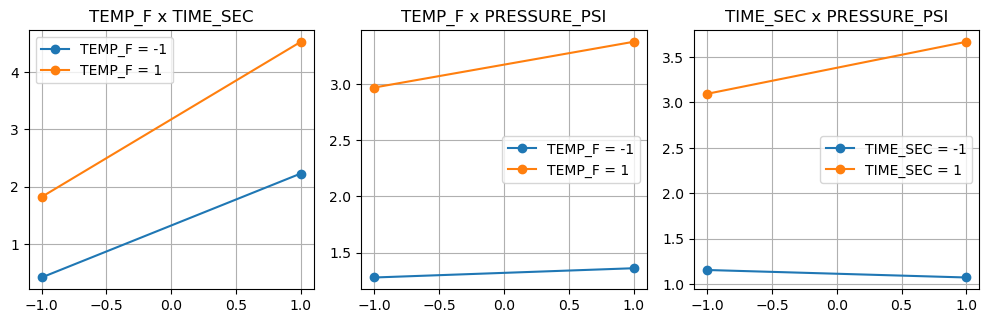

In [11]:
# Print explanation of the interaction point plot
print("\n\n\n")
print("=" * 80)
print("INTERACTION POINT PLOT".center(80))
print("=" * 80)
print("The interaction point plot visualizes how pairs of factors interact to influence the dependent variable (results).")
print("~ Each subplot represents an interaction between two factors.")
print("~ The position of points along the y-axis indicates the average value of the results column for different levels of the first factor (-1 and 1).")
print("~ Diverging or converging lines suggest the presence or absence of interaction effects:")
print("  ~ Divergence: Indicates a significant interaction between the factors.")
print("  ~ Convergence: Suggests a weaker interaction or no interaction between the factors.")
print("=" * 80)

def interaction_point_plot(df, results_column):
    """
    Plots interaction point plot based on the DataFrame and results_column.
    
    Args:
    - df (pd.DataFrame): DataFrame containing the data.
    - results_column (str): Name of the column containing the results.
    """
    if df is None:  # Check if DataFrame is empty
        print("DataFrame is empty.")
        return
    
    # Filter columns based on the unique values in the 'Factor' column
    factors = df['Factor'].unique()
    factor_columns = [col for col in factors if col in df.columns]
    
    # Filter combinations to include only those involving factor columns
    interactions = list(itertools.combinations(factor_columns, 2))
    
    # Calculate number of rows and columns for subplots
    cols = 3
    rows = math.ceil(len(interactions) / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(10, 10*rows/3))

    for idx, interaction in enumerate(interactions):
        row = idx // cols
        col = idx % cols

        ax = axs[row, col] if rows > 1 else axs[col]

        # Plot interaction point for each level of the first factor
        for level in [-1, 1]:
            subset = df[df[interaction[0]] == level]
            ax.plot(subset[interaction[1]].unique(), subset.groupby(interaction[1])[results_column].mean(), 'o-', label=f'{interaction[0]} = {level}')

        ax.set_title(f'{interaction[0]} x {interaction[1]}')  # Set title for the subplot
        ax.legend()  # Add legend to the subplot
        ax.grid(True)  # Add grid to the subplot

    # Handle any remaining axes (if there's no data to plot in them)
    for idx in range(len(interactions), rows*cols):
        row = idx // cols
        col = idx % cols
        axs[row, col].axis('off')  # Turn off axes for empty subplots

    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot


interaction_point_plot(global_df, 'Results')

## ANOVA TABLE

In [12]:
# Extract unique non-nan values from the 'Factor' column and convert them to strings
factors = [str(factor) for factor in global_df['Factor'].unique() if pd.notnull(factor)]

# Generate combinations of two factors
factor_combinations = list(itertools.combinations(factors, 2))

# Construct the formula string
formula_parts = []

# Add individual factors
formula_parts.extend(factors)

# Generate interaction terms
interaction_terms = [f'{f1}:{f2}' for f1, f2 in factor_combinations]
formula_parts.extend(interaction_terms)

formula_string = 'Results ~ ' + ' + '.join(formula_parts)

print("\n\n\nModel Formula: ")
print(formula_string)

# Fit the model using ordinary least squares (OLS)
# This step performs the regression analysis
model = sm.formula.ols(formula_string, data=global_df).fit()




Model Formula: 
Results ~ TEMP_F + TIME_SEC + PRESSURE_PSI + TEMP_F:TIME_SEC + TEMP_F:PRESSURE_PSI + TIME_SEC:PRESSURE_PSI


## MODEL SUMMARY

In [13]:
# Print model summary
print("\n\n\n")
print("=" * 80)
print("MODEL SUMMARY".center(80))
print("=" * 80)
print("This summary provides information about the regression analysis results.")
print("~ R-squared (R²): Measures the proportion of the variance in the dependent variable explained by the independent variables.")
print("~ Adjusted R-squared (Adj. R²): Adjusts R-squared for the number of predictors.")
print("~ Coefficients: Represent the estimated change in the dependent variable for a one-unit change in the predictor.")
print("~ p-value: Indicates the probability of observing the effect if the null hypothesis (no effect) is true.")
print("  A lower p-value suggests that the predictor is statistically significant.\n")

print(model.summary())







                                 MODEL SUMMARY                                  
This summary provides information about the regression analysis results.
~ R-squared (R²): Measures the proportion of the variance in the dependent variable explained by the independent variables.
~ Adjusted R-squared (Adj. R²): Adjusts R-squared for the number of predictors.
~ Coefficients: Represent the estimated change in the dependent variable for a one-unit change in the predictor.
~ p-value: Indicates the probability of observing the effect if the null hypothesis (no effect) is true.
  A lower p-value suggests that the predictor is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     31.91
Date:                Mon, 1

c:\Users\ChrisSaid\anaconda3\envs\BiQ_env_20231205\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


## MODEL DIAGNOSTICS





                                DIAGNOSTIC PLOTS                                

1. Residuals vs. Fits:
   ~ Check for heteroscedasticity (unequal variance) pattern.
       ~ Ideally, residuals should be randomly scattered around the horizontal line at y=0.
    
2. Residuals vs. Order:
   ~ Look for any patterns or trends in residuals across the order of data collection.
   ~ Absence of patterns indicates independence of residuals over time.
    
3. Q-Q Plot:
   ~ Assess the normality of residuals.
   ~ Points should closely follow the diagonal line for normal distribution.


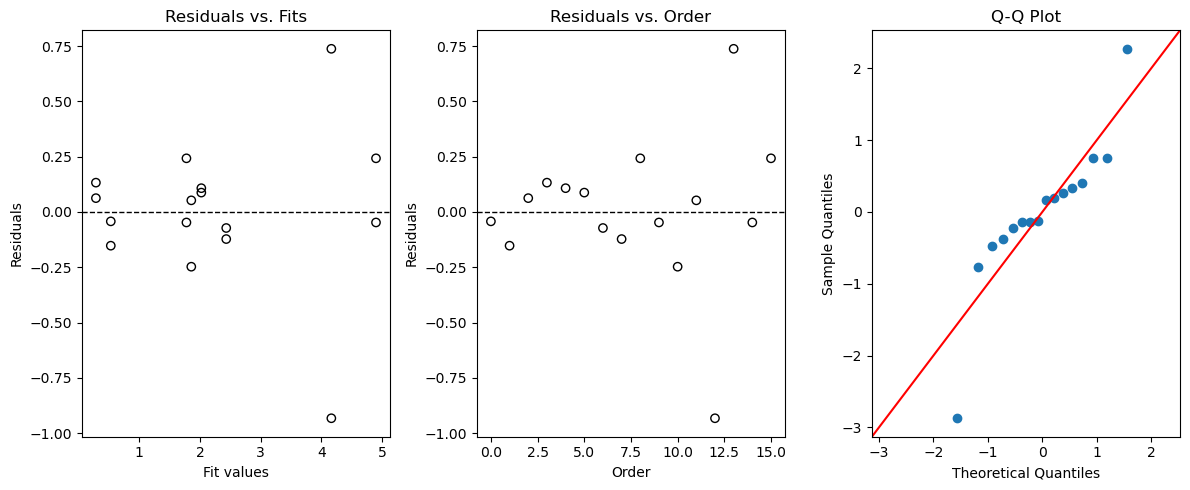

In [14]:
def diagnostic_plots(model):
    # Extract residuals and predicted values from the model
    residuals = model.resid
    predicted = model.fittedvalues
    
    # Print interpretation string
    print("\n\n\n")
    print("=" * 80)
    print("DIAGNOSTIC PLOTS".center(80))
    print("=" * 80)
    print("""
1. Residuals vs. Fits:
   ~ Check for heteroscedasticity (unequal variance) pattern.
       ~ Ideally, residuals should be randomly scattered around the horizontal line at y=0.
    
2. Residuals vs. Order:
   ~ Look for any patterns or trends in residuals across the order of data collection.
   ~ Absence of patterns indicates independence of residuals over time.
    
3. Q-Q Plot:
   ~ Assess the normality of residuals.
   ~ Points should closely follow the diagonal line for normal distribution.""")
    print("=" * 80)

    # Create subplots with one row and three columns
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))  # Creating a figure and axes for subplots
    
    # Residuals vs Fits
    axs[0].scatter(predicted, residuals, edgecolors='k', facecolors='none')  # Scatter plot of predicted vs residuals
    axs[0].axhline(y=0, color='k', linestyle='dashed', linewidth=1)  # Horizontal line at y=0
    axs[0].set_title('Residuals vs. Fits')  # Setting title for the subplot
    axs[0].set_xlabel('Fit values')  # Setting label for x-axis
    axs[0].set_ylabel('Residuals')  # Setting label for y-axis
    
    # Residuals vs. Order (Order of Data Collection)
    axs[1].scatter(range(len(residuals)), residuals, edgecolors='k', facecolors='none')  # Scatter plot of residuals vs runs
    axs[1].axhline(y=0, color='k', linestyle='dashed', linewidth=1)  # Horizontal line at y=0
    axs[1].set_title('Residuals vs. Order')  # Setting title for the subplot
    axs[1].set_xlabel('Order')  # Setting label for x-axis
    axs[1].set_ylabel('Residuals')  # Setting label for y-axis
    
    # Q-Q plot
    sm.qqplot(residuals, line='45', fit=True, ax=axs[2])  # Q-Q plot of residuals
    axs[2].set_title('Q-Q Plot')  # Setting title for the subplot
    
    plt.tight_layout()  # Adjusting layout to prevent overlap
    plt.show()  # Displaying the plots

diagnostic_plots(model)

## 3D SURFACE PLOTS

### HELD VALUE = 1





                                 SURFACE PLOTS                                  

~ Each subplot represents a 3D surface plot showing the relationship between two factors.
~ The z-axis represents the 'Results' obtained from the predictive model.
~ Factors other than the plotted ones are held constant at the specified value.


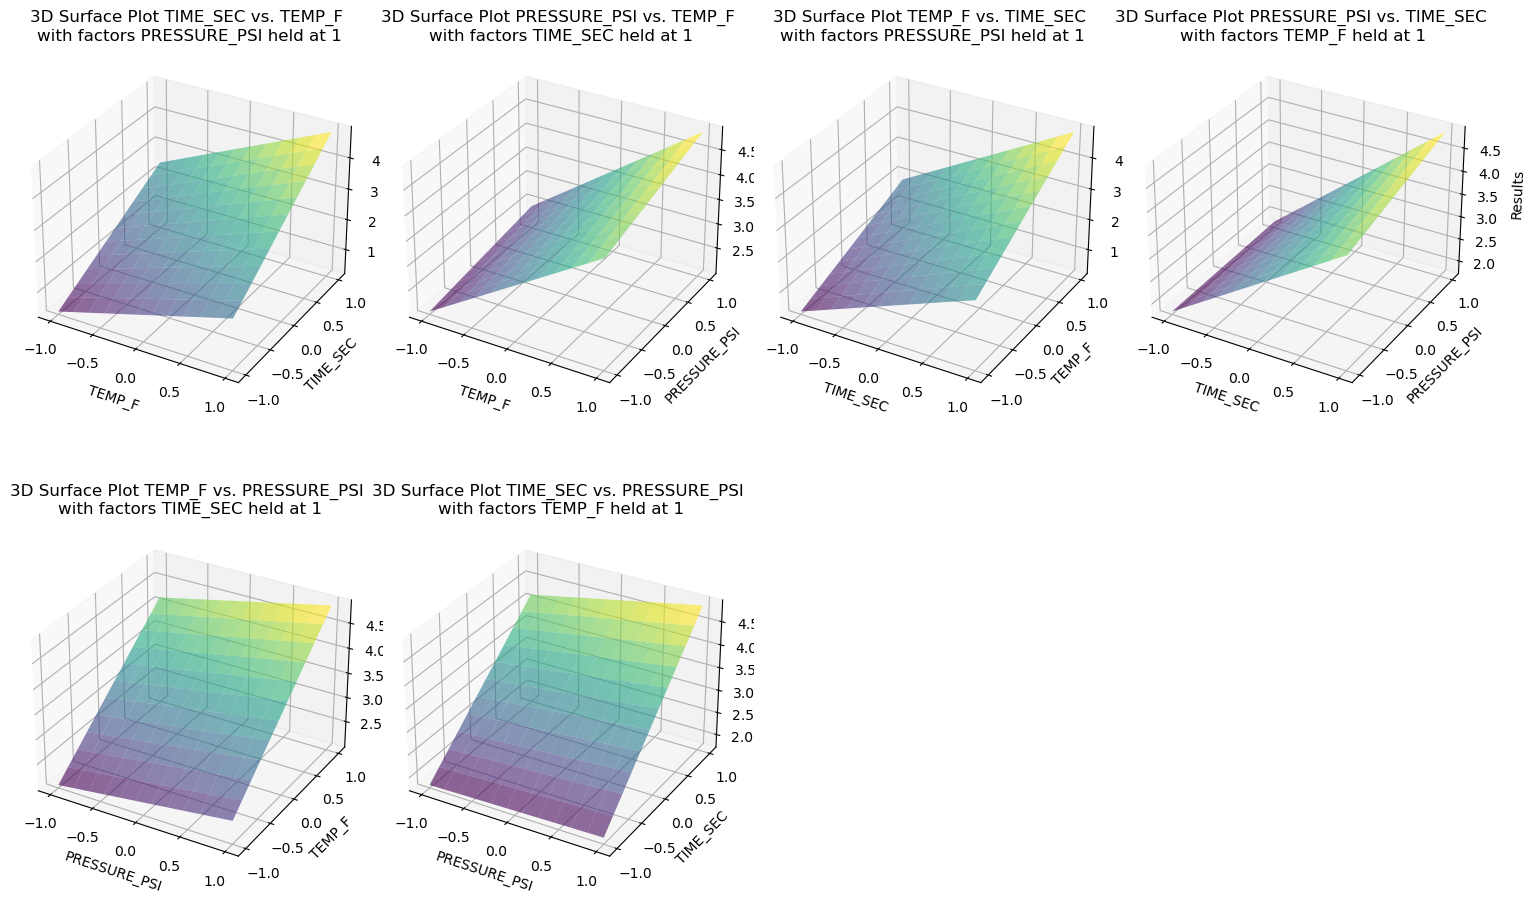

In [15]:
def plot_3D_surface(title, df, model, held_value, num_values=12):
    # Filter out columns based on the unique values in the 'Factor' column
    factors = df['Factor'].unique()
    factor_columns = [col for col in factors if col in df.columns]

    # Generate all possible combinations of factors for x_name and y_name
    factor_combinations_xy = list(itertools.permutations(factor_columns, 2))

    # Create subplots
    num_plots = len(factor_combinations_xy)
    num_cols = 4  # Number of columns in the grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), subplot_kw={'projection': '3d'})

    # Interpretation string
    print("\n\n\n")
    print("=" * 80)
    print("SURFACE PLOTS".center(80))
    print("=" * 80)
    print("""
~ Each subplot represents a 3D surface plot showing the relationship between two factors.
~ The z-axis represents the 'Results' obtained from the predictive model.
~ Factors other than the plotted ones are held constant at the specified value.""")
    print("=" * 80)

    # Iterate through combinations for x_name and y_name
    for i, (x_name, y_name) in enumerate(factor_combinations_xy):
        # Identify held factors
        held_factors = [factor for factor in factor_columns if factor != x_name and factor != y_name]

        # Get min and max values for x and y
        x_min, x_max = df[x_name].min(), df[x_name].max()
        y_min, y_max = df[y_name].min(), df[y_name].max()

        # Create a DataFrame with all possible values for x and y
        x_values = np.linspace(x_min, x_max, num_values)
        y_values = np.linspace(y_min, y_max, num_values)
        A_values, B_values = np.meshgrid(x_values, y_values)
        Z = np.zeros((len(y_values), len(x_values)))

        # Predict using the model and store data in a dataframe
        for j, y_val in enumerate(y_values):
            for k, x_val in enumerate(x_values):
                df_pred = pd.DataFrame({
                    x_name: [x_val],
                    y_name: [y_val],
                    **{held_factor: [held_value] for held_factor in held_factors}
                })
                result = model.predict(df_pred)[0]
                Z[j, k] = result

        # Plotting the surface
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.plot_surface(A_values, B_values, Z, cmap='viridis', alpha=0.6)

        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_zlabel('Results')
        ax.set_title(f'{title} {y_name} vs. {x_name} \nwith factors {", ".join(held_factors)} held at {held_value}')

    # Hide any unused subplots
    for i in range(num_plots, num_rows * num_cols):
        ax = axes[i // num_cols, i % num_cols]
        ax.axis('off')

    # Set proper spacing between subplots directly on the figure
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.5, hspace=0.8)

    plt.tight_layout()
    plt.show()


plot_3D_surface("3D Surface Plot", global_df, model, 1)


### HELD VALUE = -1

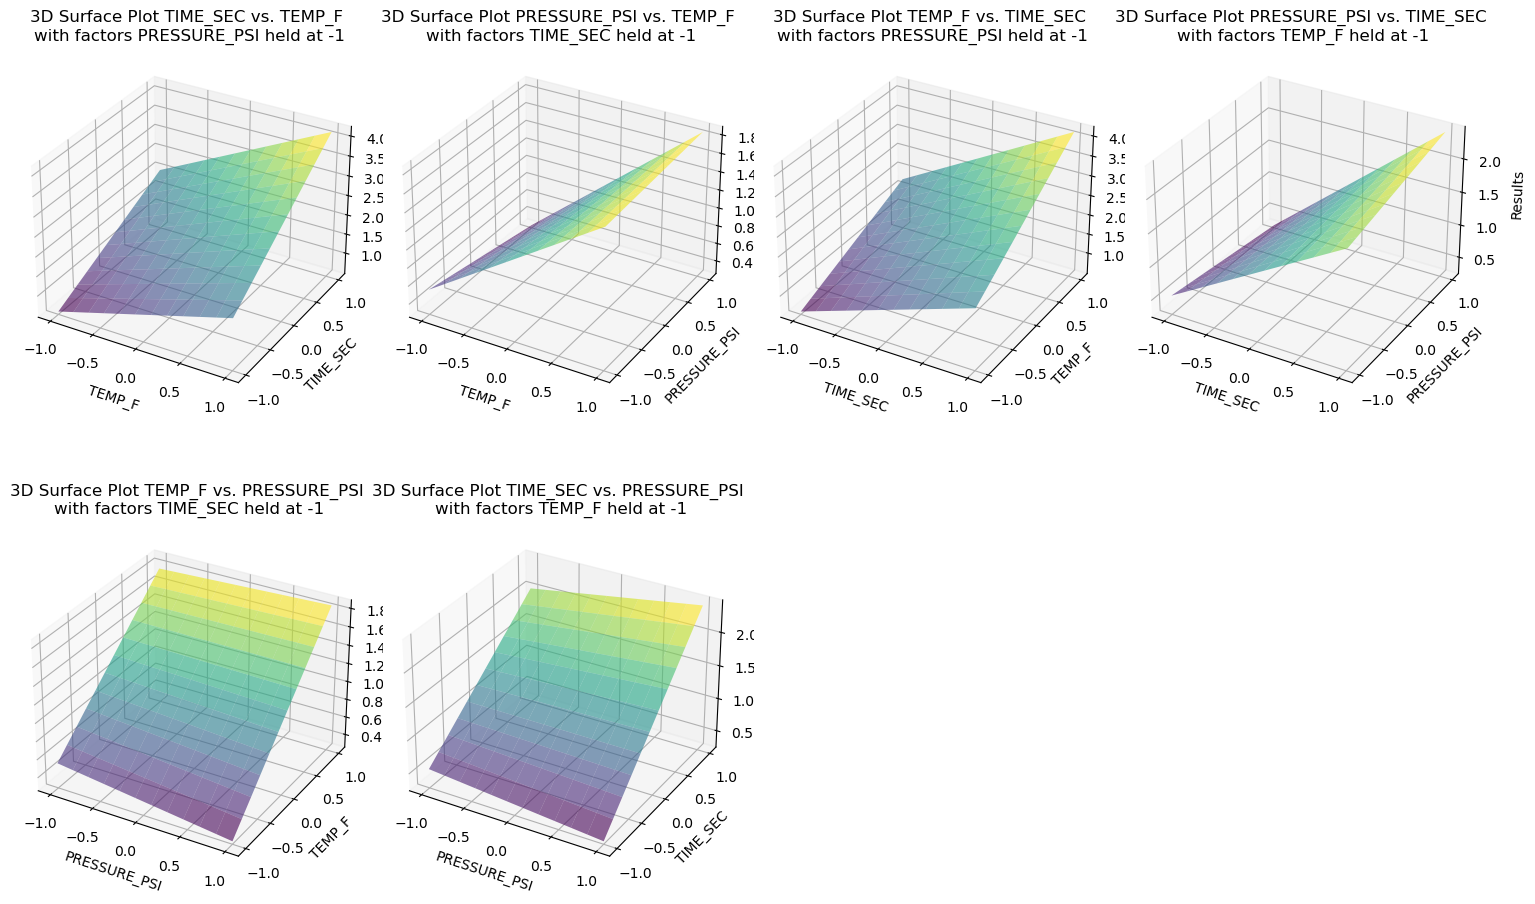

In [16]:
def plot_3D_surface(title, df, model, held_value, num_values=12):
    # Filter out columns based on the unique values in the 'Factor' column
    factors = df['Factor'].unique()
    factor_columns = [col for col in factors if col in df.columns]

    # Generate all possible combinations of factors for x_name and y_name
    factor_combinations_xy = list(itertools.permutations(factor_columns, 2))

    # Create subplots
    num_plots = len(factor_combinations_xy)
    num_cols = 4  # Number of columns in the grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), subplot_kw={'projection': '3d'})


    # Iterate through combinations for x_name and y_name
    for i, (x_name, y_name) in enumerate(factor_combinations_xy):
        # Identify held factors
        held_factors = [factor for factor in factor_columns if factor != x_name and factor != y_name]

        # Get min and max values for x and y
        x_min, x_max = df[x_name].min(), df[x_name].max()
        y_min, y_max = df[y_name].min(), df[y_name].max()

        # Create a DataFrame with all possible values for x and y
        x_values = np.linspace(x_min, x_max, num_values)
        y_values = np.linspace(y_min, y_max, num_values)
        A_values, B_values = np.meshgrid(x_values, y_values)
        Z = np.zeros((len(y_values), len(x_values)))

        # Predict using the model and store data in a dataframe
        for j, y_val in enumerate(y_values):
            for k, x_val in enumerate(x_values):
                df_pred = pd.DataFrame({
                    x_name: [x_val],
                    y_name: [y_val],
                    **{held_factor: [held_value] for held_factor in held_factors}
                })
                result = model.predict(df_pred)[0]
                Z[j, k] = result

        # Plotting the surface
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.plot_surface(A_values, B_values, Z, cmap='viridis', alpha=0.6)

        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_zlabel('Results')
        ax.set_title(f'{title} {y_name} vs. {x_name} \nwith factors {", ".join(held_factors)} held at {held_value}')

    # Hide any unused subplots
    for i in range(num_plots, num_rows * num_cols):
        ax = axes[i // num_cols, i % num_cols]
        ax.axis('off')

    # Set proper spacing between subplots directly on the figure
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.5, hspace=0.8)

    plt.tight_layout()
    plt.show()


plot_3D_surface("3D Surface Plot", global_df, model, -1)


## CONTOUR PLOTS

### HELD VALUE = 1





                                 CONTOUR PLOTS                                  

~ Each contour line represents a region of constant predicted values.
~ Factors other than the plotted ones are held constant at the specified value.


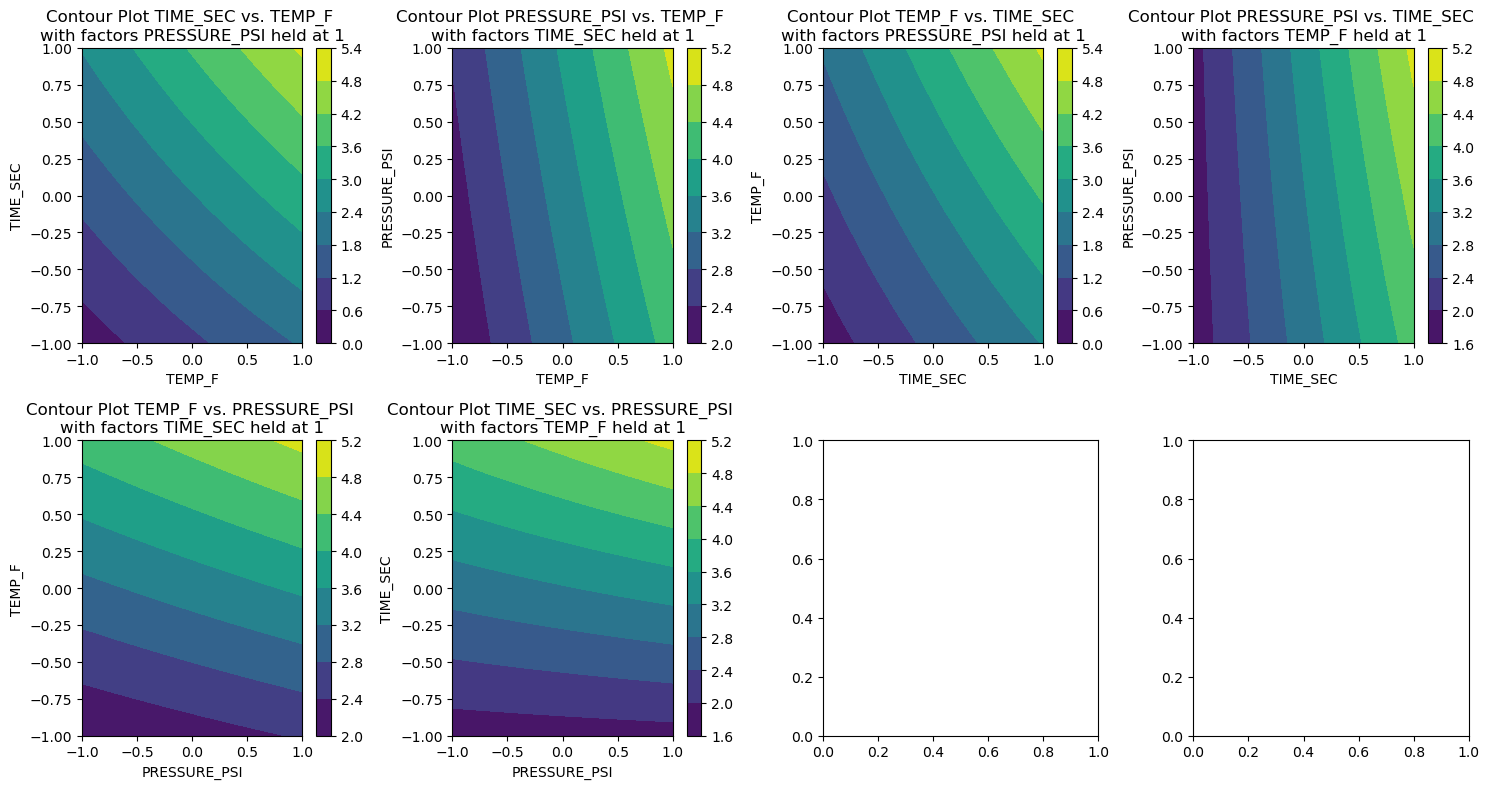

In [17]:
def plot_contour(title, df, model, held_value, num_values=10):
    # Filter out columns based on the unique values in the 'Factor' column
    factors = df['Factor'].unique()
    factor_columns = [col for col in factors if col in df.columns]

    # Generate all possible combinations of factors for x_name and y_name
    factor_combinations_xy = list(itertools.permutations(factor_columns, 2))

    # Create subplots
    num_plots = len(factor_combinations_xy)
    num_rows = (num_plots + 3) // 4  # Round up to the nearest multiple of 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 4))
    
    # Interpretation string
    
    print("\n\n\n")
    print("=" * 80)
    print("CONTOUR PLOTS".center(80))
    print("=" * 80)
    print("""
~ Each contour line represents a region of constant predicted values.
~ Factors other than the plotted ones are held constant at the specified value.""")
    print("=" * 80)

    
    # Iterate through combinations for x_name and y_name
    for i, (x_name, y_name) in enumerate(factor_combinations_xy):
        # Identify held factors
        held_factors = [factor for factor in factor_columns if factor != x_name and factor != y_name]
        
        # Get min and max values for x and y
        x_min, x_max = df[x_name].min(), df[x_name].max()
        y_min, y_max = df[y_name].min(), df[y_name].max()
        
        # Create a DataFrame with all possible values for x and y
        x_values = np.linspace(x_min, x_max, num_values)
        y_values = np.linspace(y_min, y_max, num_values)
        A_values, B_values = np.meshgrid(x_values, y_values)
        Z = np.zeros((len(y_values), len(x_values)))

        # Predict using the model and store data in a dataframe
        for j, y_val in enumerate(y_values):
            for k, x_val in enumerate(x_values):
                df_pred = pd.DataFrame({
                    x_name: [x_val],
                    y_name: [y_val],
                    **{held_factor: [held_value] for held_factor in held_factors}
                })
                result = model.predict(df_pred)[0]
                Z[j, k] = result
        
        # Plotting the contour plot
        ax = axes[i // 4, i % 4]
        contour = ax.contourf(A_values, B_values, Z, cmap='viridis')
        fig.colorbar(contour, ax=ax)
        
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_title(f'{title} {y_name} vs. {x_name} \nwith factors {", ".join(held_factors)} held at {held_value}')
        
        # Add interactive cursor to display values
        mpldatacursor.datacursor(ax, hover=False, formatter="X: {x:.2f}\nY: {y:.2f}\nZ: {Z:.2f}")

    # Set proper spacing between subplots directly on the figure
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.5, hspace=0.8)

    plt.tight_layout()
    plt.show()

plot_contour("Contour Plot", global_df, model, 1)


### HELD VALUE = -1

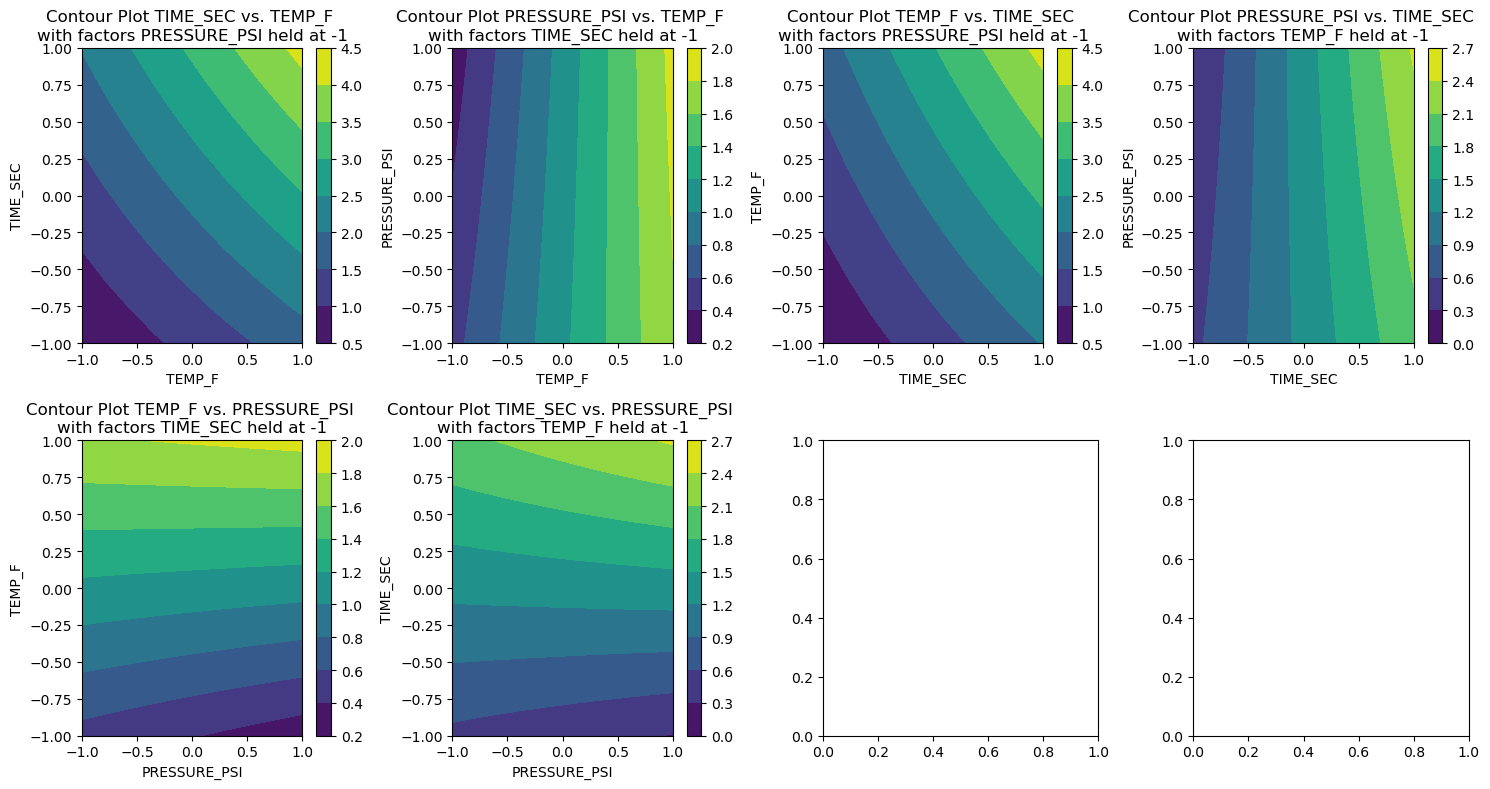

In [18]:
def plot_contour(title, df, model, held_value, num_values=10):
    # Filter out columns based on the unique values in the 'Factor' column
    factors = df['Factor'].unique()
    factor_columns = [col for col in factors if col in df.columns]

    # Generate all possible combinations of factors for x_name and y_name
    factor_combinations_xy = list(itertools.permutations(factor_columns, 2))

    # Create subplots
    num_plots = len(factor_combinations_xy)
    num_rows = (num_plots + 3) // 4  # Round up to the nearest multiple of 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 4))
        
    # Iterate through combinations for x_name and y_name
    for i, (x_name, y_name) in enumerate(factor_combinations_xy):
        # Identify held factors
        held_factors = [factor for factor in factor_columns if factor != x_name and factor != y_name]
        
        # Get min and max values for x and y
        x_min, x_max = df[x_name].min(), df[x_name].max()
        y_min, y_max = df[y_name].min(), df[y_name].max()
        
        # Create a DataFrame with all possible values for x and y
        x_values = np.linspace(x_min, x_max, num_values)
        y_values = np.linspace(y_min, y_max, num_values)
        A_values, B_values = np.meshgrid(x_values, y_values)
        Z = np.zeros((len(y_values), len(x_values)))

        # Predict using the model and store data in a dataframe
        for j, y_val in enumerate(y_values):
            for k, x_val in enumerate(x_values):
                df_pred = pd.DataFrame({
                    x_name: [x_val],
                    y_name: [y_val],
                    **{held_factor: [held_value] for held_factor in held_factors}
                })
                result = model.predict(df_pred)[0]
                Z[j, k] = result
        
        # Plotting the contour plot
        ax = axes[i // 4, i % 4]
        contour = ax.contourf(A_values, B_values, Z, cmap='viridis')
        fig.colorbar(contour, ax=ax)
        
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_title(f'{title} {y_name} vs. {x_name} \nwith factors {", ".join(held_factors)} held at {held_value}')
        
        # Add interactive cursor to display values
        mpldatacursor.datacursor(ax, hover=False, formatter="X: {x:.2f}\nY: {y:.2f}\nZ: {Z:.2f}")

    # Set proper spacing between subplots directly on the figure
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.5, hspace=0.8)

    plt.tight_layout()
    plt.show()

# Usage example:
plot_contour("Contour Plot", global_df, model, -1)


## RESPONSE OPTIMIZATION

In [19]:
def optimize_response(df, model):
    """
    Optimizes the response based on the given model and DataFrame.

    Args:
    - df (pd.DataFrame): DataFrame containing the data.
    - model (statsmodels.regression.linear_model.RegressionResultsWrapper): Fitted regression model.

    Returns:
    - dict: Dictionary containing the optimized settings and predicted response value.
    """
    if df.empty or model is None:
        return {
            "Maximized Settings": None,
            "Maximized Response": None,
            "Minimized Settings": None,
            "Minimized Response": None,
            "Target Settings": None,
            "Target Response": None
        }
    
    # Filter columns based on the unique values in the 'Factor' column
    factors = df['Factor'].unique()
    factor_columns = [col for col in factors if col in df.columns]

    # Calculate the number of levels for each factor
    num_levels = {factor: len(df[factor].unique()) for factor in factor_columns}

    # Generate integers based on the number of levels for each factor
    integers = {factor: [-1, 1] if num_levels[factor] == 2 else [-1, 0, 1] for factor in factor_columns}
    value_combinations = itertools.product(*[integers[factor] for factor in factor_columns])

    # Initialize variables for optimized settings and response value
    optimized_settings_max = None
    optimized_response_max = None
    optimized_settings_min = None
    optimized_response_min = None
    optimized_settings_target = None
    optimized_response_target = None

    # Iterate over each combination of factor values
    for values in value_combinations:
        # Create a DataFrame with the current combination of factor values
        data = pd.DataFrame({factor: [value] for factor, value in zip(factor_columns, values)})
        
        # Predict response for the current combination
        predicted_response = model.predict(data).iloc[0]  # Extract the predicted value
        
        # Update maximum response
        if optimized_response_max is None or predicted_response > optimized_response_max:
            optimized_response_max = predicted_response
            optimized_settings_max = {factor: value for factor, value in zip(factor_columns, values)}
        
        # Update minimum response
        if optimized_response_min is None or predicted_response < optimized_response_min:
            optimized_response_min = predicted_response
            optimized_settings_min = {factor: value for factor, value in zip(factor_columns, values)}
        
        # Check if desired response value is provided
        if 'Target Response' in df.columns:
            desired_response_value = df['Target Response'].iloc[0]
            # Update target response
            if optimized_response_target is None or abs(predicted_response - desired_response_value) < abs(optimized_response_target - desired_response_value):
                optimized_response_target = predicted_response
                optimized_settings_target = {factor: value for factor, value in zip(factor_columns, values)}

    return {
        "Maximized Settings": optimized_settings_max,
        "Maximized Response": optimized_response_max,
        "Minimized Settings": optimized_settings_min,
        "Minimized Response": optimized_response_min,
        "Target Settings": optimized_settings_target,
        "Target Response": optimized_response_target
    }

# Call the function to optimize response with integers based on the number of levels for each factor
optimization_result = optimize_response(global_df, model)

# Print an interpretation of the optimization results
print("=" * 80)
print("OPTIMIZATION RESULTS".center(80))
print("=" * 80)
print("These results represent the best settings to achieve the maximum, minimum, or target predicted response values.")
print("Maximized Response Settings:", optimization_result["Maximized Settings"])
print("Maximized Response Value:", optimization_result["Maximized Response"])
print("Minimized Response Settings:", optimization_result["Minimized Settings"])
print("Minimized Response Value:", optimization_result["Minimized Response"])
# Check if there are target response settings
if optimization_result["Target Settings"] is not None:
    print("Target Response Settings:", optimization_result["Target Settings"])
    print("Target Response Value:", optimization_result["Target Response"])
print("=" * 80)

                              OPTIMIZATION RESULTS                              
These results represent the best settings to achieve the maximum, minimum, or target predicted response values.
Maximized Response Settings: {'TEMP_F': 1, 'TIME_SEC': 1, 'PRESSURE_PSI': 1}
Maximized Response Value: 4.897499999999999
Minimized Response Settings: {'TEMP_F': -1, 'TIME_SEC': -1, 'PRESSURE_PSI': 1}
Minimized Response Value: 0.28750000000000187
